In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import mplleaflet
from networkx.algorithms import bipartite


In [15]:
def gener_graph(csvdf):
    G = nx.DiGraph()
    G = nx.from_pandas_edgelist(csvdf, 'user_id', 'business_id')
    csvdf.columns=['user_stars','user_id','business_id','user_name','business_name','business_stars','review_count','latitude','longitude']
    nodes = csvdf[['business_id',"business_name","review_count",'latitude','longitude']].drop_duplicates(subset=None, keep='first', inplace=False)
    nx.set_node_attributes(G,  pd.Series(nodes.review_count.values, index=nodes.business_id).to_dict(),'review_count')
    nx.set_node_attributes(G,  pd.Series(nodes.latitude.values, index=nodes.business_id).to_dict(),'latitude')
    nx.set_node_attributes(G,  pd.Series(nodes.longitude.values, index=nodes.business_id).to_dict(),'longitude')
    nx.set_node_attributes(G,  pd.Series(nodes.business_name.values, index=nodes.business_id).to_dict(), 'business_name')
    return G
def bipartite_business(csvdf):
    G = gener_graph(csvdf)
    business=set(csvdf['business_id'])
    G_b= bipartite.weighted_projected_graph(G, business)
    return G_b
def draw_bipartite(csvdf):
    G_b = bipartite_business(csvdf)
    node_positions = {node[0]: (node[1]['longitude'], node[1]['latitude']) for node in G_b.nodes(data=True)}
    fig, ax = plt.subplots()

    edge_width = [1.5*G_b[u][v]['weight'] for u,v in G_b.edges()]
    node_size = [20*nx.get_node_attributes(G_b, 'review_count')[v] for v in G_b]
    node_color = [G_b.degree(v) for v in G_b]
    nx.draw_networkx(G_b,pos=node_positions,node_size=node_size,node_color=node_color, alpha=0.8,  with_labels=False,width=edge_width,edge_color='.4', cmap=plt.cm.Reds)

    mplleaflet.display(fig=ax.figure)
    plt.show()

** Markham restaurants review stars over 4**

In [16]:
markham_4=pd.read_csv('dataset/Markham.csv')
markham_4.shape

(4454, 9)

In [17]:
G_b4=bipartite_business(markham_4)

In [18]:
nodes = markham_4[['business_id',"business_name",'business_stars',"review_count",'latitude','longitude']].drop_duplicates(subset=None, keep='first', inplace=False)
#nodes.to_excel('nodes.xlsx')
nodes.head()

,business_id,business_name,business_stars,review_count,latitude,longitude
0,Cx0wkl85Xdw9OCQkbXMjzQ,Sushi Bong,4.0,93,43.8035,-79.4206
70,5XVabANkehj7oH-Z7YZkwg,Alchemy Coffee,4.0,231,43.8606,-79.3120
249,3AWtQN1iX9n9DjRfvxMEWw,Duck & Chicken,4.0,11,43.8059,-79.4220
257,0KQE_-HWEAL_eBKIsEFf3Q,Sakura Seoul,4.0,8,43.8034,-79.4194
263,XCxxPZ3Lu5mwmIo7IQRf1g,Osaka Sushi Japanese Korean Restaurant,4.0,236,43.8723,-79.2668


# top 10 restaurants ranking by reciew_count

In [19]:
nodes.sort_values(by=['review_count'],ascending=False).head(10)

,business_id,business_name,business_stars,review_count,latitude,longitude
767,xaqW4NkmUCGRRjmLxiFJ6Q,Muncheez,4.5,329,43.8032,-79.4195
1588,htQgj-ANQpZGpIpkkrEmyQ,Inspire Restaurant,4.0,299,43.8792,-79.2613
2506,f3gE6ZZFd7jRBjTVgt-mAg,Pa Pa Chang's,4.0,246,43.8915,-79.2656
263,XCxxPZ3Lu5mwmIo7IQRf1g,Osaka Sushi Japanese Korean Restaurant,4.0,236,43.8723,-79.2668
70,5XVabANkehj7oH-Z7YZkwg,Alchemy Coffee,4.0,231,43.8606,-79.3120
587,1_rqZz1K5Uoq2RvZlINfgA,Cho Sun Ok,4.0,195,43.8068,-79.4219
1268,hPTx2Y5e4Czbr21XcbDN8g,Mei Nung Beef Noodle House,4.0,173,43.8515,-79.3519
1115,K1nwSvx14on6eVBbu5E9rA,Good Catch Boil House,4.0,157,43.8496,-79.3224
3174,Cs8BaiKkyNU6mzxq9nTsmg,Congee Queen,4.0,150,43.8685,-79.2824
3975,YNpwfdqBeP6j8aFrJp2sQw,Sweet Esc,4.0,138,43.8240,-79.3264


**clustering coefficient**

In [20]:
nx.average_clustering(G_b4)

0.6767444340504005

In [21]:
#add business name as node label
node_labels = nx.get_node_attributes(G_b4, 'business_name')

{'-7EwIdxcRC5McO35DVfeSQ': 'Xin Jiang Restaurant',
 '-Lgj3gdQZiVngAEc1yALzw': 'NextDoor',
 '0KQE_-HWEAL_eBKIsEFf3Q': 'Sakura Seoul',
 '0XlbdDkYzC14SZF_bUGeXA': 'Chef Chan',
 '0tAbgK3TT6bNHtT4KOHZCQ': 'Sakana-Ya',
 '1_rqZz1K5Uoq2RvZlINfgA': 'Cho Sun Ok',
 '2iSXzsmucGHn_NM51y29bQ': "Mother's Deli & Bakery",
 '3AWtQN1iX9n9DjRfvxMEWw': 'Duck & Chicken',
 '5XVabANkehj7oH-Z7YZkwg': 'Alchemy Coffee',
 '6Bmq3b91hqTwMFn5cpPWzQ': 'Wonton Time',
 '6ThiBVRWO3alyc7WJ9TMmw': 'Tutto Panini & Pasta',
 '7wi0yczEe3OC3P8CpkZz2g': 'After Queen Tea Shop',
 '872bhARqHoDEljyEboTDew': 'Spicy Pizza and Wings',
 '8lPxiYChdJdTV24NJvOB3Q': 'Big Beef Bowl Hand-Pulled Noodle',
 '8xPmlVJy2o6x0J04CBpEMQ': 'Toast Delight',
 '9AVuEdSl85ZEd49zrdsK5g': "Harvey's Restaurants",
 '9fKYo_6qLPofBbts0JAnSw': 'Main St Greek',
 '9q_O836mXia6Lqkirl2Ynw': 'Little Caesar',
 'Ac0kKKfYGM-vKORWCg20eg': 'Get & Go Buritto',
 'AuKKWh7jc1G7G_P_l8fd-g': 'Yanagi Sushi',
 'B4SQCxWWvOLlyqHBFrNlSw': 'The Lucky 20 Bakery + Cafe',
 'BCa9j5GEo5ln

In [18]:
#draw network on map
node_positions = {node[0]: (node[1]['longitude'], node[1]['latitude']) for node in G_b4.nodes(data=True)}
fig, ax = plt.subplots()

edge_width = [1.5*G_b4[u][v]['weight'] for u,v in G_b4.edges()]
node_size = [10*nx.get_node_attributes(G_b4, 'review_count')[v] for v in G_b4]
node_color = [G_b4.degree(v) for v in G_b4]
nx.draw_networkx(G_b4,pos=node_positions,node_size=node_size,node_color=node_color, edge_color='.4',alpha=0.6, with_labels=True,width=edge_width, cmap=plt.cm.Reds)
greater_than_5 = [x for x in G_b4.edges(data=True) if x[2]['weight']>10]
nx.draw_networkx_edges(G_b4,pos=node_positions, edgelist=greater_than_5, edge_color='r', alpha=0.4,width=4)
#nx.draw_networkx_labels(G_b4,pos=node_positions, labels=node_labels,font_size=16,font_color='b')

#mplleaflet.display(fig=ax.figure)
mplleaflet.show(path='markham-4stars.html')

In [22]:
#find isolate nodes
nx.isolates(G_b4)

['TqZk5nsqYBOa62XYQ7bXvQ',
 'xLhO9n3lE23RCSoo_7d21w',
 'lX553YVMOt46NAaQyhNf7w',
 'f5xm2RiwLv0gbmXU4BkrGA',
 '_GxIYv74MyV0pEZ28ZHSlQ']

In [23]:
#remove isolates
remove = [node for node,degree in G_b4.degree().items() if degree < 1]

['TqZk5nsqYBOa62XYQ7bXvQ',
 'xLhO9n3lE23RCSoo_7d21w',
 'lX553YVMOt46NAaQyhNf7w',
 'f5xm2RiwLv0gbmXU4BkrGA',
 '_GxIYv74MyV0pEZ28ZHSlQ']

In [24]:
G_b4.remove_nodes_from(remove)
G_b4.number_of_nodes()

139

In [25]:
deg=nx.degree(G_b4) 
#deg
import operator
degsort=sorted(deg.items(),key=operator.itemgetter(1),reverse=True)
#degsort

[('5XVabANkehj7oH-Z7YZkwg', 90),
 ('f3gE6ZZFd7jRBjTVgt-mAg', 89),
 ('xaqW4NkmUCGRRjmLxiFJ6Q', 87),
 ('htQgj-ANQpZGpIpkkrEmyQ', 87),
 ('bNqBMZ00lnhhfxzV8OhLfQ', 85),
 ('K1nwSvx14on6eVBbu5E9rA', 85),
 ('1_rqZz1K5Uoq2RvZlINfgA', 80),
 ('XCxxPZ3Lu5mwmIo7IQRf1g', 79),
 ('pOvTYClFgMm-wAXPW1CnhQ', 76),
 ('Cs8BaiKkyNU6mzxq9nTsmg', 75),
 ('hPTx2Y5e4Czbr21XcbDN8g', 73),
 ('LKDGDUiDKTuo93gwF5guPA', 72),
 ('kNZJMnTNXj42EfUGX3eRcw', 72),
 ('ax4ztJvW28xgGvI0OPqGcQ', 70),
 ('8lPxiYChdJdTV24NJvOB3Q', 69),
 ('8xPmlVJy2o6x0J04CBpEMQ', 68),
 ('sePTDv1dGHPID7kwuNzXaA', 68),
 ('l9vx-OTdDPU-oHZ17aVxdg', 67),
 ('9fKYo_6qLPofBbts0JAnSw', 65),
 ('zBd5JvFWuMGlnCYLaGsXZg', 63),
 ('cqUky5KFtMlqKaAUYiOnLA', 60),
 ('zLPs4wSjtfZxVy3WByt00g', 59),
 ('hDO8bWV_Ua8NxtfpStuuZg', 58),
 ('-Lgj3gdQZiVngAEc1yALzw', 56),
 ('Hk1Q874UqawFXq0XzIIBYg', 54),
 ('b1fiN3A2fmsuQzNvIRtiPQ', 54),
 ('Cx0wkl85Xdw9OCQkbXMjzQ', 54),
 ('-7EwIdxcRC5McO35DVfeSQ', 53),
 ('TITY-kzuk2hLumFrPnVlgA', 52),
 ('CC8AIB3g1d88YVpmaUsVgA', 51),
 ('mPKgBVR

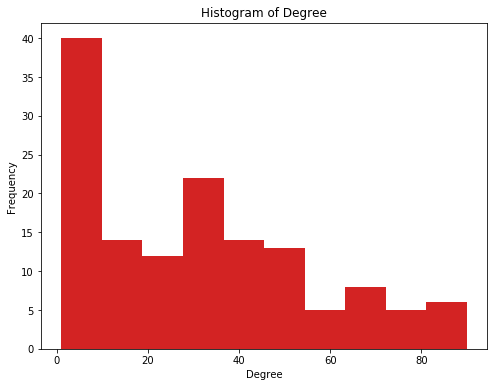

In [26]:
#degree distribution
df_deg = pd.DataFrame(degsort, columns=['id', 'degree'])
#df_deg.head()
plt.figure(figsize=(8,6))

plt.hist(df_deg['degree'],color='#D32323')
plt.title("Histogram of Degree")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.savefig('degree.jpg')

plt.show()

In [27]:
#edge weight
df4 = pd.DataFrame(G_b4.edges(data=True), columns=['business1', 'business2', 'weight'])
df4['weight'] = df4['weight'].map(lambda x: x['weight'])
df4.head()

,business1,business2,weight
0,vUqIE5La92aMJrY8kGgwsw,fTkbO_-v88Ldn_cJwxHYQQ,1
1,vUqIE5La92aMJrY8kGgwsw,vfxgy-NJlpd6mrMTZTMSBg,1
2,vUqIE5La92aMJrY8kGgwsw,miUmZ27vC-gHoyEmUQMYuQ,1
3,vUqIE5La92aMJrY8kGgwsw,aWndhjjBzYgk5OOYflbK4A,1
4,vUqIE5La92aMJrY8kGgwsw,NQF7wgb3mHfMPzy5owzxxQ,1


/Users/jiahuibi/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


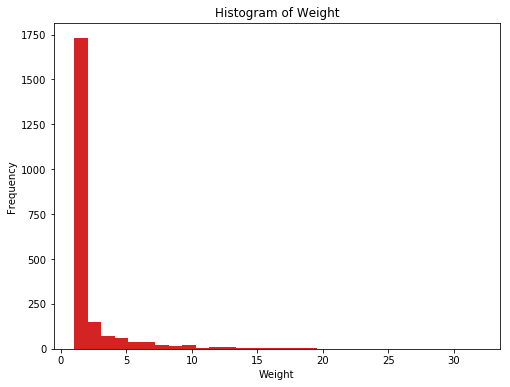

In [20]:
#weight distribution
plt.figure(figsize=(8,6))
plt.subplot(1,1,1,axisbg=(1,1,1))
plt.hist(df4['weight'],color='#D32323',bins=30)
plt.title("Histogram of Weight")
plt.xlabel("Weight")
plt.ylabel("Frequency")
#plt.savefig('weight.jpg')
plt.show()

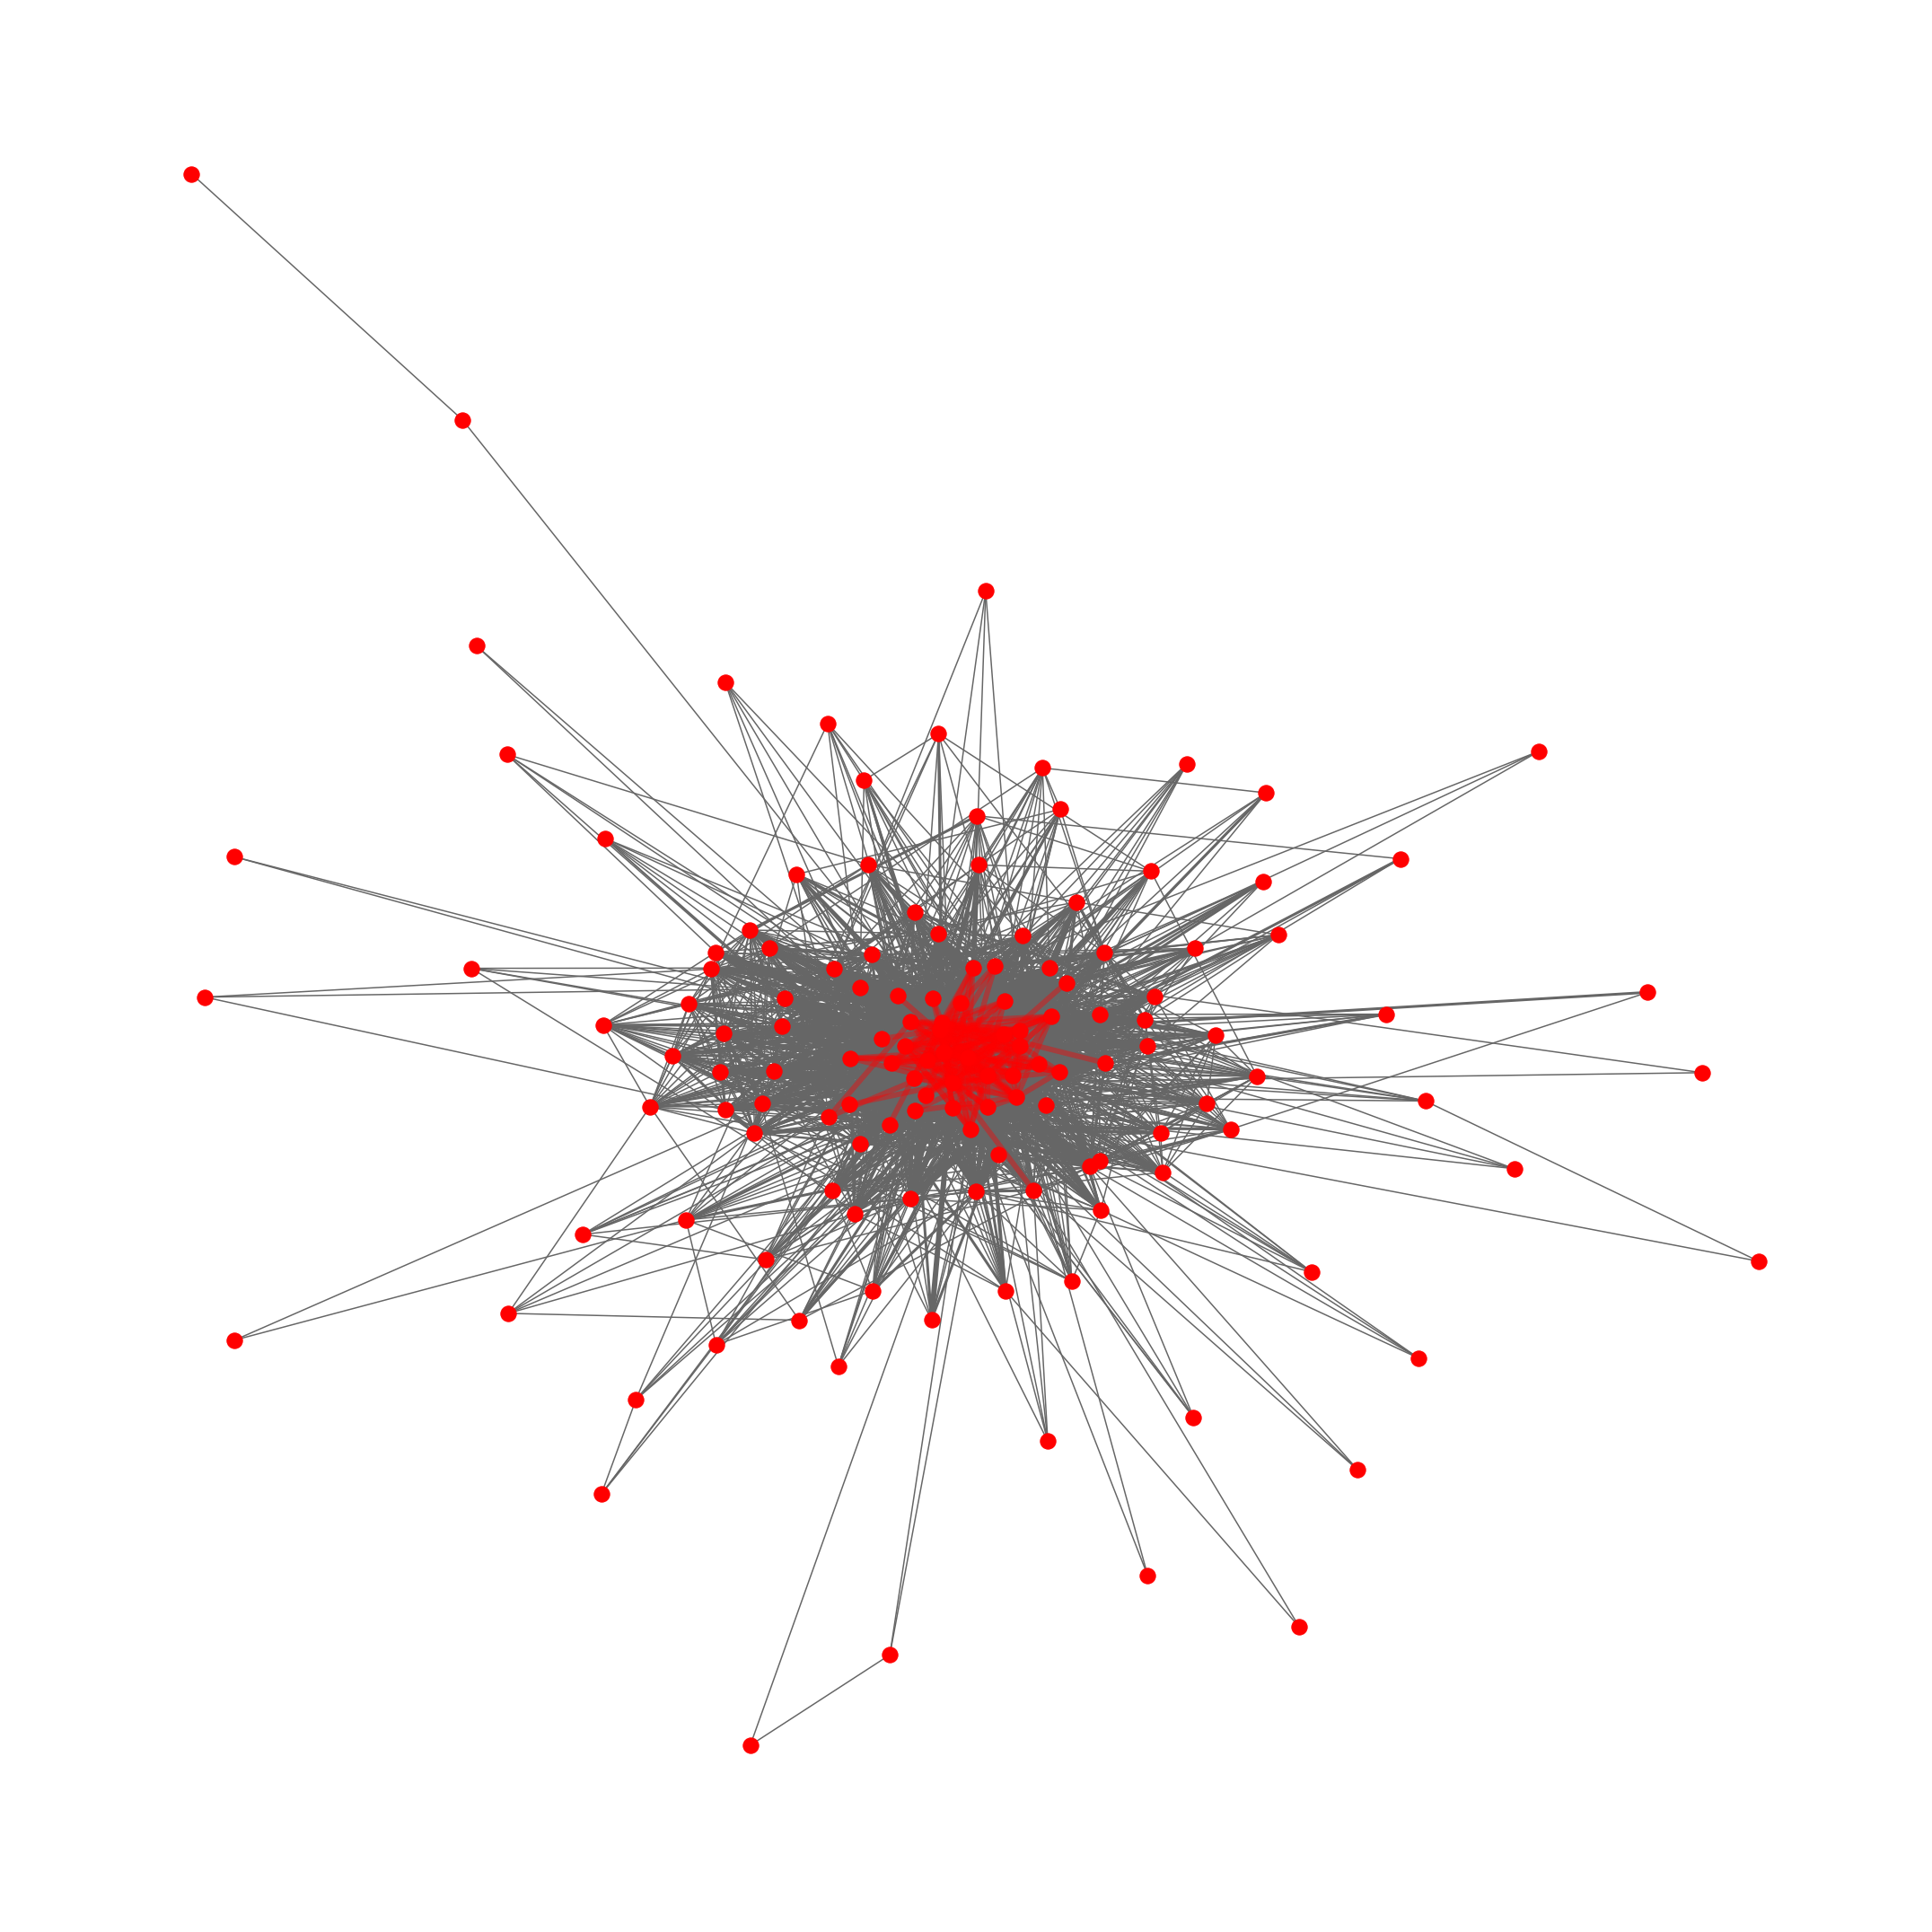

In [22]:
#draw network without map
pos = nx.spring_layout(G_b4)
edge_width = [1.5*G_b4[u][v]['weight'] for u,v in G_b4.edges()]
nx.draw_networkx(G_b4,pos,with_labels=False,width=edge_width,edge_color='.4')
greater_than_5 = [x for x in G_b4.edges(data=True) if x[2]['weight']>5]
nx.draw_networkx_edges(G_b4,pos, edgelist=greater_than_5, edge_color='r', alpha=0.4, width=6)
from pylab import rcParams #set figure size
rcParams['figure.figsize'] = 30,30
#plt.figure(figsize=(40,40))
plt.axis('off')
plt.tight_layout();
plt.show()

In [36]:
#get betweeness centrality ranking
btwnCent = nx.betweenness_centrality(G_b4,normalized= True,endpoints=False)
btwsort=sorted(btwnCent.items(),key=operator.itemgetter(1),reverse=True)
df_btw = pd.DataFrame(btwsort, columns=['business_id', 'btw'])
df1=df_btw.head(10)
topbtw=df1['business_id'].values.tolist()
topbtw
df1
#btwsort

,business_id,btw
0,f3gE6ZZFd7jRBjTVgt-mAg,0.061673
1,xaqW4NkmUCGRRjmLxiFJ6Q,0.048997
2,5XVabANkehj7oH-Z7YZkwg,0.046382
3,htQgj-ANQpZGpIpkkrEmyQ,0.042539
4,pOvTYClFgMm-wAXPW1CnhQ,0.040563
5,bNqBMZ00lnhhfxzV8OhLfQ,0.036563
6,Cs8BaiKkyNU6mzxq9nTsmg,0.036398
7,l9vx-OTdDPU-oHZ17aVxdg,0.035940
8,kNZJMnTNXj42EfUGX3eRcw,0.035000
9,hPTx2Y5e4Czbr21XcbDN8g,0.034981


# Top 10 restaurants ranking by betweenness centrailty

In [39]:
nodes.loc[nodes['business_id'].isin(topbtw)]
pd.merge(df1,nodes.loc[nodes['business_id'].isin(topbtw)]).to_excel('topbtw.xlsx')
pd.merge(df1,nodes.loc[nodes['business_id'].isin(topbtw)])

,business_id,btw,business_name,business_stars,review_count,latitude,longitude
0,f3gE6ZZFd7jRBjTVgt-mAg,0.061673,Pa Pa Chang's,4.0,246,43.8915,-79.2656
1,xaqW4NkmUCGRRjmLxiFJ6Q,0.048997,Muncheez,4.5,329,43.8032,-79.4195
2,5XVabANkehj7oH-Z7YZkwg,0.046382,Alchemy Coffee,4.0,231,43.8606,-79.3120
3,htQgj-ANQpZGpIpkkrEmyQ,0.042539,Inspire Restaurant,4.0,299,43.8792,-79.2613
4,pOvTYClFgMm-wAXPW1CnhQ,0.040563,Bamiyan Kabob,4.0,106,43.8551,-79.2563
5,bNqBMZ00lnhhfxzV8OhLfQ,0.036563,Big Bone BBQ & Wicked Wings,4.0,136,43.8748,-79.2803
6,Cs8BaiKkyNU6mzxq9nTsmg,0.036398,Congee Queen,4.0,150,43.8685,-79.2824
7,l9vx-OTdDPU-oHZ17aVxdg,0.035940,Federick Restaurant,4.0,133,43.8512,-79.2534
8,kNZJMnTNXj42EfUGX3eRcw,0.035000,Los Chicos Brasa,4.0,114,43.8504,-79.2539
9,hPTx2Y5e4Czbr21XcbDN8g,0.034981,Mei Nung Beef Noodle House,4.0,173,43.8515,-79.3519


# Top 10 restaurants ranking by closeness centrailty

In [40]:
closeCent = nx.closeness_centrality(G_b4, normalized=True)
closesort=sorted(closeCent.items(),key=operator.itemgetter(1),reverse=True)
df_cls = pd.DataFrame(closesort, columns=['business_id', 'cls'])
df2=df_cls.head(10)
topcls=df2['business_id'].values.tolist()
#nodes.loc[nodes['business_id'].isin(topcls)].to_excel('topcls.xlsx')
nodes.loc[nodes['business_id'].isin(topcls)]
pd.merge(df2,nodes.loc[nodes['business_id'].isin(topcls)]).to_excel('topcls.xlsx')
pd.merge(df2,nodes.loc[nodes['business_id'].isin(topcls)])

,business_id,cls,business_name,business_stars,review_count,latitude,longitude
0,f3gE6ZZFd7jRBjTVgt-mAg,0.737968,Pa Pa Chang's,4.0,246,43.8915,-79.2656
1,5XVabANkehj7oH-Z7YZkwg,0.737968,Alchemy Coffee,4.0,231,43.8606,-79.3120
2,xaqW4NkmUCGRRjmLxiFJ6Q,0.726316,Muncheez,4.5,329,43.8032,-79.4195
3,htQgj-ANQpZGpIpkkrEmyQ,0.726316,Inspire Restaurant,4.0,299,43.8792,-79.2613
4,bNqBMZ00lnhhfxzV8OhLfQ,0.718750,Big Bone BBQ & Wicked Wings,4.0,136,43.8748,-79.2803
5,K1nwSvx14on6eVBbu5E9rA,0.718750,Good Catch Boil House,4.0,157,43.8496,-79.3224
6,1_rqZz1K5Uoq2RvZlINfgA,0.700508,Cho Sun Ok,4.0,195,43.8068,-79.4219
7,XCxxPZ3Lu5mwmIo7IQRf1g,0.696970,Osaka Sushi Japanese Korean Restaurant,4.0,236,43.8723,-79.2668
8,pOvTYClFgMm-wAXPW1CnhQ,0.686567,Bamiyan Kabob,4.0,106,43.8551,-79.2563
9,Cs8BaiKkyNU6mzxq9nTsmg,0.683168,Congee Queen,4.0,150,43.8685,-79.2824


# Top 10 restaurants ranking by eigenvector centrailty

In [41]:
eigcen=nx.eigenvector_centrality_numpy(G_b4) 
eigensort=sorted(eigcen.items(),key=operator.itemgetter(1),reverse=True)
df_eig = pd.DataFrame(eigensort, columns=['business_id', 'eig'])
df3=df_eig.head(10)
topeig=df3['business_id'].values.tolist()
#nodes.loc[nodes['business_id'].isin(topeig)].to_excel('topeig.xlsx')
nodes.loc[nodes['business_id'].isin(topeig)]
pd.merge(df3,nodes.loc[nodes['business_id'].isin(topeig)]).to_excel('topeig.xlsx')
pd.merge(df3,nodes.loc[nodes['business_id'].isin(topeig)])

,business_id,eig,business_name,business_stars,review_count,latitude,longitude
0,htQgj-ANQpZGpIpkkrEmyQ,0.326390,Inspire Restaurant,4.0,299,43.8792,-79.2613
1,f3gE6ZZFd7jRBjTVgt-mAg,0.319284,Pa Pa Chang's,4.0,246,43.8915,-79.2656
2,5XVabANkehj7oH-Z7YZkwg,0.277881,Alchemy Coffee,4.0,231,43.8606,-79.3120
3,K1nwSvx14on6eVBbu5E9rA,0.265135,Good Catch Boil House,4.0,157,43.8496,-79.3224
4,xaqW4NkmUCGRRjmLxiFJ6Q,0.245889,Muncheez,4.5,329,43.8032,-79.4195
5,XCxxPZ3Lu5mwmIo7IQRf1g,0.221690,Osaka Sushi Japanese Korean Restaurant,4.0,236,43.8723,-79.2668
6,bNqBMZ00lnhhfxzV8OhLfQ,0.208214,Big Bone BBQ & Wicked Wings,4.0,136,43.8748,-79.2803
7,1_rqZz1K5Uoq2RvZlINfgA,0.186580,Cho Sun Ok,4.0,195,43.8068,-79.4219
8,8xPmlVJy2o6x0J04CBpEMQ,0.185343,Toast Delight,4.0,135,43.8572,-79.3033
9,zBd5JvFWuMGlnCYLaGsXZg,0.181736,Pho Metro,4.0,110,43.8891,-79.3149


In [27]:
degcen=nx.degree_centrality(G_b4)
degreesort=sorted(degcen.items(),key=operator.itemgetter(1),reverse=True)
df_degree = pd.DataFrame(degreesort, columns=['id', 'degreecen'])
df_degree.head()

,id,degreecen
0,5XVabANkehj7oH-Z7YZkwg,0.652174
1,f3gE6ZZFd7jRBjTVgt-mAg,0.644928
2,htQgj-ANQpZGpIpkkrEmyQ,0.630435
3,xaqW4NkmUCGRRjmLxiFJ6Q,0.630435
4,K1nwSvx14on6eVBbu5E9rA,0.615942


In [28]:
clustering=nx.clustering(G_b4)
clustersort=sorted(clustering.items(),key=operator.itemgetter(1),reverse=True)
df_cluster = pd.DataFrame(clustersort, columns=['id', 'clustercent'])
df_cluster.head()

,id,clustercent
0,mVtV6vSMMMxLk_zIWYWG0A,1.0
1,0KQE_-HWEAL_eBKIsEFf3Q,1.0
2,d6XTJ4SO1FkORkPc9IJJZQ,1.0
3,pQUjQZgOzUX-KUXYHZKpng,1.0
4,vBIugbXbkxNb5tCtck1tSg,1.0


In [29]:
#degree centrality v.s. clustering  clustering coefficient
degree_cluster=pd.merge(df_degree,df_cluster,on='id')
degree_cluster.head()

,id,degreecen,clustercent
0,5XVabANkehj7oH-Z7YZkwg,0.652174,0.425968
1,f3gE6ZZFd7jRBjTVgt-mAg,0.644928,0.410112
2,htQgj-ANQpZGpIpkkrEmyQ,0.630435,0.399358
3,xaqW4NkmUCGRRjmLxiFJ6Q,0.630435,0.405774
4,K1nwSvx14on6eVBbu5E9rA,0.615942,0.452381


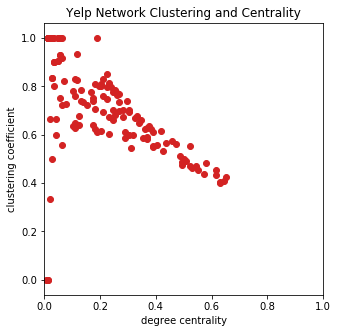

In [30]:
#plt.subplot(1,1,1,axisbg=(1,1,1))
plt.figure(figsize=(5,5))
plt.scatter(degree_cluster.degreecen,degree_cluster.clustercent,color='#D32323')
plt.xlabel("degree centrality")
plt.ylabel("clustering coefficient")
plt.xlim(0,1)
plt.title("Yelp Network Clustering and Centrality")
plt.savefig("clustering$centrality.jpg")
plt.show()

In [31]:
#degree centrality v.s. review
df_review=nodes[['business_id',"review_count"]]
df_review.columns=['id','review_count']
#df_review
degree_review=pd.merge(df_degree,df_review,on='id')
degree_review.head()

,id,degreecen,review_count
0,5XVabANkehj7oH-Z7YZkwg,0.652174,231
1,f3gE6ZZFd7jRBjTVgt-mAg,0.644928,246
2,htQgj-ANQpZGpIpkkrEmyQ,0.630435,299
3,xaqW4NkmUCGRRjmLxiFJ6Q,0.630435,329
4,K1nwSvx14on6eVBbu5E9rA,0.615942,157


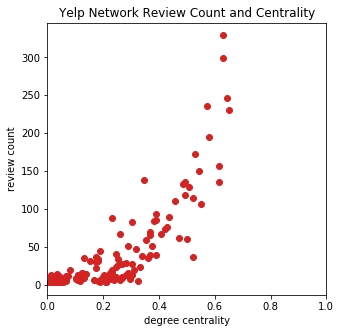

In [32]:
plt.figure(figsize=(5,5))
plt.scatter(degree_review.degreecen,degree_review.review_count,color='#D32323')
plt.xlabel("degree centrality")
plt.ylabel("review count")
plt.xlim(0,1)
plt.title("Yelp Network Review Count and Centrality")
plt.savefig("review$centrality.jpg")
plt.show()